## Estudo amostral


Como vimos logo no início, existem tipos diferentes de estudo estatístico. Às vezes queremos estimar um parâmetro, às vezes comparar grupos, ver a correlação entre 2 variáveis, etc. Por isso, vamos estudar 3 tipos diferentes de estudos estatísticos, mas nesta parte vamos olhar para o *Estudo Amostral*.

Num estudo amostral, o objetivo é *estimar um parâmetro* de uma população a partir de uma amostra, como fizemos até agora. Vamos supor, por exemplo, que queremos estimar a **nota final média para alunos de uma escola na disciplina de matemática avançada** do ensino médio. Para isso, precisamos apenas de uma amostra representativa da população (já vimos vários métodos diferentes de amostragem), e utilizar a média dessa amostra como estimativa para a média da população. Dessa vez, no entanto, vamos fazer isso de um jeito um pouco diferente.



### Formatos de armazenamento de dados

Nossa amostra está armazenada num arquivo **.csv** - *Comma Separated Values*, ou valores separados por vírgula. A extensão .csv é *muito comum quando se trabalha com dados*, por ser um formato leve para armazenar arquivos *tabulares*, ou seja, dados em tabelas.

Existem outras formas populares para o armazenamento de dados, como por exemplo as planilhas do excel/google sheets, que também são uma forma válida, *porém gastam mais memória* (como formatação das células, nome das páginas, metadados no geral). Para conjuntos de dados pequenos, isso não é um problema, porém quando se chega na casa das 100.000 linhas uma planilha em .xls/.xlsx (formatos do excel) o gasto de memória em metadados passa a ser inviável.

Existe também o formato **.tsv** - *Tab Separated Values*, que utiliza o tab ao invés de vírgulas para fazer a separação dos dados, e também gasta pouca memória em metadados. Geralmente, se utiliza o formato *.tsv* quando se quer utilizar a vírgula em outros campos, como por exemplo, para separar casas decimais de números. Mas, no geral, os arquivos em csv são mais populares.

Para além desses formatos, existem também os Bancos de Dados, mas que fogem do escopo deste curso.

### Lendo arquivos .csv

Se tivermos um arquivo em .csv na nossa máquina, podemos ler este arquivo em nosso código utilizando sua localização na máquina. No entanto, como às vezes acessamos máquinas diferentes para trabalhar no mesmo código, é mais interessante ter os arquivos armazenados num *servidor*, para não precisarmos fazer o download do arquivo toda vez (isso vale principalmente para arquivos muito grandes). Para isso, vamos utilizar o Github. Nosso arquivo está armazenado em:

https://raw.githubusercontent.com/hype-usp/Hype-Academy/main/Exerc%C3%ADcios%20de%20sala/notas.csv

Acesse este link para dar uma olhada em como é nosso arquivo. Na primeira linha de um arquivo csv temos os *nomes das colunas*, e nas linhas subsequentes temos os dados. Para este arquivo, temos 3 colunas: *Freq*, *Nota* e *Sala*, correspondentes a frequência, a nota de cada aluno e a sala em que este aluno está (são 3 no total).

Para lermos o arquivo em nosso código, vamos utilizar a biblioteca *pandas*, muito utilizada em ciência de dados. Se quiser dar uma olhada, a documentação do pandas pode ser encontrada [aqui](https://pandas.pydata.org/docs/) (mas não se preocupe, vamos começar só com o básico).

A função que vamos usar para ler o arquivo é o `read_csv`, em que passamos como argumento o link (ou caminho na máquina local) do nosso arquivo.

In [ ]:
import pandas as pd
notas = pd.read_csv('https://raw.githubusercontent.com/hype-usp/Hype-Academy/main/Exerc%C3%ADcios%20de%20sala/notas.csv')
notas

,Freq,Nota,Sala
0,93,3.0,1
1,83,5.5,1
2,86,7.3,1
3,80,4.4,1
4,70,5.0,1
...,...,...,...
164,93,3.4,3
165,80,4.3,3
166,67,2.3,3
167,87,4.5,3


Vamos ver algumas operações básicas de tabelas no pandas. Primeiro, se quisermos selecionar apenas uma coluna, escrevemos o nome da tabela e acessamos a coluna como se fosse uma lista, porém utilizamos o *nome da coluna* ao invés do índice:

In [ ]:
notas[['Freq']]

,Freq
0,93
1,83
2,86
3,80
4,70
...,...
164,93
165,80
166,67
167,87


Estando numa coluna, podemos acessar uma linha por indexação, como numa lista:

In [ ]:
notas['Freq'][167]

87

In [ ]:
notas.iloc[[0]]

,Freq,Nota,Sala
0,93,3.0,1


Por enquanto, precisamos apenas dessas duas funções para fazer nosso estudo amostral. 

No nosso arquivo .csv *já temos uma amostra*, pois temos as notas apenas de 3 turmas de matemática dessa escola, que foi coletada através da amostra por conglomerados (utilizando as salas como conglomerados). Os 60 primeiros alunos correspondem aos alunos da sala 1, os 60 seguintes da sala 2, e os restantes (menos de 60) correspondem aos alunos da sala 3.

Primeiro, vamos calcular a média das notas de toda amostra:

In [ ]:
len([None, 1, 2, 5, None])

5

In [ ]:
notas.shape

(169, 3)

In [ ]:
media_notas = sum(notas['Nota'])/len(notas['Nota'])
media_notas

4.792307692307691

Podemos utilizar, também, a função `.mean()` da biblioteca pandas para ver a média de uma coluna:

In [ ]:
notas['Nota'].mean()

4.792307692307691

E podemos utilizá-la, também, para ver a média de todas as colunas de uma tabela (que é também chamada de *dataframe*):

In [ ]:
notas.mean()

Freq    84.343195
Nota     4.792308
Sala     1.934911
dtype: float64

In [ ]:
notas.dtypes

Freq      int64
Nota    float64
Sala      int64
dtype: object

Como sabemos que os alunos são de 3 classes diferentes, podemos calcular a média de cada classe para sabermos qual foi a melhor. Vamos começar com a sala 1. Para testar se uma coluna tem um valor específico, em pandas, podemos fazer o seguinte:

In [ ]:
notas[list([False for i in range(len(notas))])]

,Freq,Nota,Sala


In [ ]:
notas['Sala'] == 1

0       True
1       True
2       True
3       True
4       True
       ...  
164    False
165    False
166    False
167    False
168    False
Name: Sala, Length: 169, dtype: bool

Perceba que o valor retornado é o resultado booleano dessa condição, para cada linha. Ou seja, na linha 0 temos um aluno da sala 1, assim como na linha 2. Já na linha 164, o aluno não é da sala 1. 

Para selecionarmos as linhas da tabela em que a condição testada é verdadeira, podemos acessar a tabela utilizando a condição:

In [ ]:
sala1 = (notas['Sala'] == 1)
notas[sala1]

,Freq,Nota,Sala
0,93,3.0,1
1,83,5.5,1
2,86,7.3,1
3,80,4.4,1
4,70,5.0,1
5,93,6.1,1
6,93,3.9,1
7,76,5.0,1
8,80,5.4,1
9,93,7.0,1


Agora que já temos os alunos da sala 1, é só calcularmos a média das notas deste grupo, e repetir o mesmo cálculo para as outras salas:

In [ ]:
for i in range(3):
  print('Média da sala', str(i+1)+':', notas[notas['Sala'] == i+1]['Nota'].mean())

Média da sala 1: 5.051666666666665
Média da sala 2: 4.646666666666665
Média da sala 3: 4.653061224489797


E vemos que os alunos da sala 1 foram os melhores.

Podemos incluir outras condições no nosso particionamento. Então podemos pegar, por exemplo, estudantes da sala 1 ou da sala 3:

In [ ]:
alunos_1_e_3 = notas[(notas['Sala'] == 1) | (notas['Sala'] == 3)]
print('Média da sala', 1, 'ou', str(3) + ':', alunos_1_e_3['Nota'].mean())

Média da sala 1 ou 3: 4.872477064220183


E podemos incluir quantas condições quisermos, seguindo o seguinte mapeamento:
- or, como vimos, é representado por |
- and é representado por &
- not é representado por ~

Algumas considerações finais sobre o estudo amostral:
- A amostragem é sempre **probabilística**, ou seja, os itens são escolhidos aleatoriamente.
- As conclusões que tirarmos, ou seja, que a média dos alunos é por volta de 4.79, podem ser generalizadas **para toda população**, ou seja, para os alunos de matemática avançada do ensino médio *desta escola*. Perceba que podmos generalizar para um escopo além da nossa amostra (3 salas de matemática dessa escola), mas nunca para um escopo além da nossa população (por exemplo, todos os alunos da escola, ou todos os alunos do Brasil, etc.)

## Estudo observacional

Às vezes, queremos encontrar *correlações* entre duas ou mais variáveis. Para isso, existe o segundo tipo de estudo estatístico que iremos estudar: o **estudo observacional**. Neste tipo de estudo, queremos encontrar alguma associação entre duas variáveis de interesse diferentes.

Vamos voltar para o exemplo das notas. Na célula abaixo, estamos vendo as 5 primeiras linhas da tabela notas (utilizamos a função "head", ou seja, "cabeça", para ver as 5 primeiras linhas):

In [ ]:
import pandas as pd
notas = pd.read_csv('https://raw.githubusercontent.com/hype-usp/Hype-Academy/main/Exerc%C3%ADcios%20de%20sala/notas.csv')
notas.tail()

,Freq,Nota,Sala
164,93,3.4,3
165,80,4.3,3
166,67,2.3,3
167,87,4.5,3
168,73,3.0,3


Além da nota do aluno, temos a frequência em que o aluno compareceu às aulas na coluna `Freq`, medida em porcentagem. Vamos relembrar a média geral de notas de todos os alunos:

In [ ]:
notas['Nota'].mean()

4.792307692307691

Agora, vamos comparar essa estimativa base com a média das notas dos alunos com menos de 50% de presença e com mais de 50% de presença:

In [ ]:
print('Mais de 50%:', notas[notas['Freq'] > 50]['Nota'].mean())
print('Menos de 50%:', notas[notas['Freq'] < 50]['Nota'].mean())

Mais de 50%: 4.955828220858895
Menos de 50%: 0.35000000000000003


Já vemos uma grande diferença, mas e se compararmos porcentagens ainda mais distintas?

In [ ]:
print('Mais de 90%:', notas[notas['Freq'] > 90]['Nota'].mean())
print('Menos de 40%:', notas[notas['Freq'] < 40]['Nota'].mean())

Mais de 90%: 5.8999999999999995
Menos de 40%: 0.02


Muita diferença! Comparar as médias de grupos diferentes já nos dá uma ideia de que existe alguma correlação entre as duas variáveis, mas existem jeitos mais fáceis de determinar isso. 

Podemos, por exemplo, utilizar o *coeficiente de correlação linear de Pearson*. Com ele, podemos medir se existe uma relação linear entre duas variáveis, ou seja, se quando uma cresce a outra cresce (ou diminui) na mesma proporção, e também a *força* dessa correlação. Vamos plotar a matriz de correlação utilizando a função `.corr()` do pandas:



In [ ]:
notas.corr()

,Freq,Nota,Sala
Freq,1.000000,0.574209,0.086771
Nota,0.574209,1.000000,-0.073460
Sala,0.086771,-0.073460,1.000000


Como vemos, apesar de a correlação linear entre nota e frequência ser maior do que 0.5, ela pode ser considerada apenas moderada. Isso pode significar duas coisas: ou as duas variáveis não têm nenhuma correlação forte mesmo, ou elas possuem uma correlação *não linear*. O problema é que se a segunda opção for verdadeira, então não conseguiremos captar essa outra correlação utilizando apenas o coeficiente de Pearson.

Para tentar visualizar correlações não lineares podemos, por exemplo, plotar os dados num *gráfico de dispersão*, também chamado de *scatter plot*, em inglês. Vamos utilizar uma função do próprio pandas, o `plot.scatter` (existem outros gráficos que podemos fazer com pandas, mas por enquanto vamos focar só nesse). Essa função recebe como argumento a coluna do eixo X e a coluna do eixo Y:

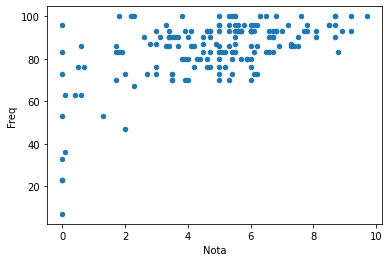

In [ ]:
notas.plot.scatter(x='Nota', y='Freq')

Podemos ver que existe sim alguma relação entre a frequência e a nota: em frequências abaixo de 60%, as notas não passam de 2. Em frequências mais altas, as notas variam bastante. No entanto, se olharmos para as notas acima de 5, todas as frequências estão acima de 65%. Olhando para as notas mais altas, toda concentração está acima de 80%. 

Podemos testar se essa correlação é mais forte para alguma das salas utilizando o número da sala como coloração (parâmetro "c"). O parâmetro "cmap" é o esquema de cores, e foi utilizado porque a cor do número "1" no esquema de cores *default* é branca.

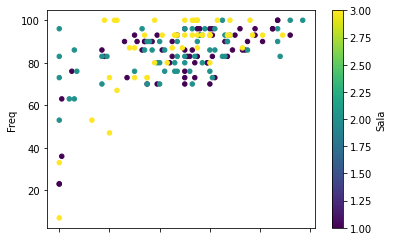

In [ ]:
notas.plot.scatter(x='Nota', y='Freq', c='Sala', cmap="viridis")

Este padrão parece se manter em todas as salas, especialmente na sala 1.

Como já vimos, apesar de a correlação linear entre nota e frequência ser maior do que 0.5, ela ainda é muito fraca. Podemos perceber isso ainda mais olhando para a *reta ajustada*, ou seja, a reta que descreve essa relação linear entre a nota e a frequência (para isso, usaremos a biblioteca seaborn por ter a funcionalidade de plotar a reta ajustada facilmente):


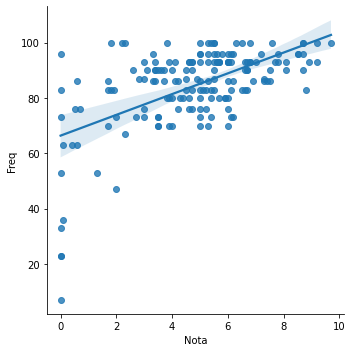

In [ ]:
import seaborn as sns
sns.lmplot(x='Nota',y='Freq',data=notas,fit_reg=True) 

Uma outra medida interessante que usaremos mais adiante é o $R^2$ ("R quadrado"), que compara a variância dos dados em relação à *média* e a variância em relação à *reta ajustada* através de uma porcentagem. Se os dados estão muito espalhados ao redor da média, quer dizer que há pouca ou nenhuma correlação; caso contrário, se eles estiverem muito mais próximos de uma reta diferente (no caso, nossa reta ajustada), é mais provável que haja uma correlação. Dessa forma, o $R^2$ calcula o quão melhor a reta ajustada é da média: se dizemos que $R^2 = 0.9$, então a reta ajustada explica 90% da variância dos dados, ou seja, é 90% melhor que a média, e podemos dizer que nossa reta ajustada é ótima. Já quando dizemos que $R^2 = 0.2$, nossa reta explica apenas 20% a mais que a média, e não é tão boa assim. O cálculo do $R^2$ é apenas o coeficiente de correlação de Pearson ao quadrado:

In [ ]:
notas.corr()**2

,Freq,Nota,Sala
Freq,1.000000,0.329716,0.007529
Nota,0.329716,1.000000,0.005396
Sala,0.007529,0.005396,1.000000


E vemos que nossa reta ajustada explica apenas ~33% da variância dos dados.

No entanto, se olharmos bem para o nosso gráfico de dispersão, percebemos que ele tem uma forma similar a uma onda do mar. Esse tipo de gráfico, como vimos na escola, é o gráfico padrão de uma função *logarítmica*!

Quando percebemos esse tipo de relação, em formato de onda do mar, podemos fazer uma *transformação logarítmica* que, basicamente, é a mesma coisa que tirar o logaritmo de todos os valores, tanto de nota quanto de frequência. Para isso, vamos utilizar uma biblioteca chamada *numpy* (calma que ainda vamos ver muito sobre ela, mas por enquanto só vamos ficar no básico). Vamos usar a função `log`, que computa o logaritmo natural de todos os elementos de uma lista, e aplicá-la nas nossas 2 colunas:

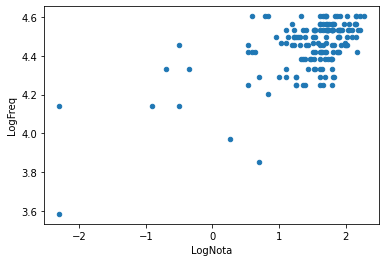

In [ ]:
import numpy as np

notas['LogFreq'] = pd.DataFrame(np.log(notas['Freq']))
notas['LogNota'] = pd.DataFrame([None if n == 0 else np.log(n) for n in notas['Nota']]) # tratando casos em que a nota é 0 (log infinito)

notas.plot.scatter(x='LogNota', y='LogFreq')

Agora, apesar de estarem ainda um pouco dispersos em LogNotas mais baixas, os dados estão com uma cara bem mais "linear". Veja abaixo como fica a nossa nova reta ajustada:

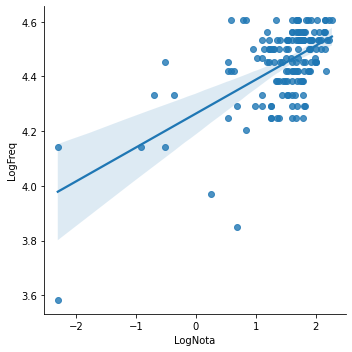

In [ ]:
import seaborn as sns
sns.lmplot(x='LogNota',y='LogFreq',data=notas,fit_reg=True) 

Isso é um sinal de que os logaritmos de notas e frequências possuem alguma correlação linear. Vamos conferir os coeficientes de Pearson entre as novas colunas para nos certificar:

In [ ]:
notas.corr()

,Freq,Nota,Sala,LogFreq,LogNota
Freq,1.000000,0.574209,0.086771,0.934547,0.564030
Nota,0.574209,1.000000,-0.073460,0.507661,0.866321
Sala,0.086771,-0.073460,1.000000,0.025928,0.017046
LogFreq,0.934547,0.507661,0.025928,1.000000,0.598543
LogNota,0.564030,0.866321,0.017046,0.598543,1.000000


Mesmo que pequeno, houve um aumento no nosso coeficiente de correlação. No entanto, é difícil interpretar o *quão significativo* foi esse aumento. É aí que entra o nosso $R^2$:

In [ ]:
notas.corr()**2

,Freq,Nota,Sala,LogFreq,LogNota
Freq,1.000000,0.329716,0.007529,0.873379,0.318130
Nota,0.329716,1.000000,0.005396,0.257720,0.750511
Sala,0.007529,0.005396,1.000000,0.000672,0.000291
LogFreq,0.873379,0.257720,0.000672,1.000000,0.358254
LogNota,0.318130,0.750511,0.000291,0.358254,1.000000


E vemos que nosso ganho foi de apenas ~3% entre as retas ajustadas, o que não deixa de ser um progresso, porém ainda muito pequeno para considerarmos relevante.

Vamos ver se a correlação é mais forte para alguma sala em específico:

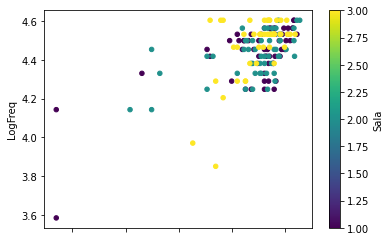

In [ ]:
notas.plot.scatter(x='LogNota', y='LogFreq', c='Sala', cmap="viridis")

Aparentemente, a sala 1 e 3 têm um aspecto mais linear. Na célula abaixo vamos dar uma olhada no $R^2$ e no coeficiente de correlação entre LogNota e LogFreq em cada sala:

In [ ]:
print('Sala 1: R^2 =', notas[notas['Sala'] == 1].corr()['LogFreq']['LogNota']**2, ', corr =', notas[notas['Sala'] == 1].corr()['LogFreq']['LogNota'])
print('Sala 2: R^2 =', notas[notas['Sala'] == 2].corr()['LogFreq']['LogNota']**2, ', corr =', notas[notas['Sala'] == 2].corr()['LogFreq']['LogNota'])
print('Sala 3: R^2 =', notas[notas['Sala'] == 3].corr()['LogFreq']['LogNota']**2, ', corr =', notas[notas['Sala'] == 3].corr()['LogFreq']['LogNota'])

Sala 1: R^2 = 0.4801233313307335 , corr = 0.6929093240321806
Sala 2: R^2 = 0.30420670039059045 , corr = 0.5515493635120889
Sala 3: R^2 = 0.3287673427717291 , corr = 0.5733823704751735


E como esperávamos, a reta para as salas 1 e 3 são as que mais explicam sua variância, em especial a sala 1 (quase metade de sua variância é explicada pela reta ajustada). Abaixo, plotamos apenas a sala 1:

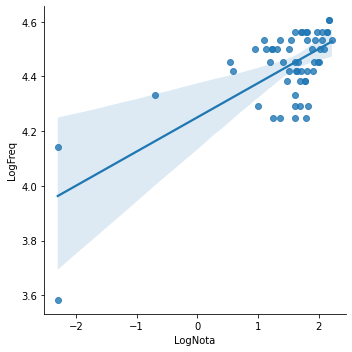

In [ ]:
import seaborn as sns
sns.lmplot(x='LogNota',y='LogFreq',data=notas[notas['Sala'] == 1],fit_reg=True) 

Por não chegar a 0.7, ainda não podemos considerar a correlação como forte. Portanto, podemos concluir que, realmente, essas duas variáveis possuem uma correlação moderada, e ainda seria necessário o estudo de outras variáveis que podem influenciar a nota de um aluno. 

Alguns pontos e algumas ressalvas sobre o estudo observacional:
- Assim como no estudo amostral, amostragem é sempre **probabilística**, ou seja, os itens são escolhidos aleatoriamente.
- Novamente assim como o estudo amostral, as conclusões que tiramos podem ser generalizadas para a nossa **população**, ou seja, os alunos de matemática avançada do ensino médio dessa escola.
- A relação que descobrimos entre as variáveis é uma **CORRELAÇÃO**, que é *diferente* de uma relação de **CAUSA E CONSEQUÊNCIA** (deixei em caps porque é muito importante). Ou seja: apesar de podermos dizer que nota e frequência andam de mãos dadas, NÃO podemos afirmar que, por exemplo, a nota de um aluno é baixa *porque* sua frequência é baixa, ou vice-versa. Para ter uma ideia do motivo, dê uma olhada [neste artigo do buzzfeed](https://www.buzzfeednews.com/article/kjh2110/the-10-most-bizarre-correlations).

## Experimento

Vamos supor que você fez um estudo observacional e descobriu uma correlação, que você imagina que pode ser uma relação causal. Como você faz para testar se realmente existe essa relação de causa e efeito, e não apenas uma coincidência?

Para isso, existem os *Experimentos*. Com ele, podemos coletar dados baseados numa **hipótese** e testar se ela se mantém em cenários diferentes, que são criados para mitigar os efeitos de possívels **variáveis confundidoras** (que explicam a correlação entre as duas variáveis). Neste cenário, se ainda encontrarmos uma relação de correlação, podemos determinar que esta relação é de causa e efeito. Para entender a ideia geral e o vocabulário dos experimentos, vamos ver um exemplo.
 

### A linguagem dos experimentos

Vamos supor que sua empresa fez um medicamento novo para tratar uma doença que afeta a pressão sanguínea e você quer testar se ele faz efeito utilizando um experimento.

- Sua **hipótese** é o que você acha que vai acontecer (ou quer que aconteça). Nesse caso, sua hipótese é a de que o medicamento consegue tratar a doença.

- Quando um paciente acha que está tomando um medicamento que vai fazer bem à sua saúde, ele pode apresentar uma melhoria nos sintomas, mesmo que o medicamento não tenha efeito - é o chamado **efeito placebo**. Por isso, a ideia do experimento é comparar a melhoria de um paciente que tomou o medicamento de verdade com a melhoria do paciente que tomou um placebo. Dessa forma, se o paciente que tomou o medicamento melhorou mais do que o paciente que tomou o placebo, podemos concluir que a sua melhoria foi **causada** pelo medicamento.

- Sendo assim, você terá que realizar uma amostra de pacientes com aquela doença e dividí-los em 2 grupos: o grupo de **tratamento**, em que os pacientes receberão o tratamento proposto (ou seja, o medicamento), e um grupo de **controle**, em que os participantes não receberão o tratamento (ou seja, um placebo).

- As variáveis que você testará será o uso do medicamento, sua variável **explicativa**, e a mudança na pressão sanguínea, sua variável **resposta**.

- Os **tratamentos** que os grupos receberão serão o consumo do medicamento (grupo de tratamento) e o não consumo do medicamento (grupo de controle).

- As **unidades experimentais** serão os pacientes que possuem a doença.

- Para que o efeito placebo não ocorra, é muito importante que este seja um **estudo cego**, ou seja, os pacientes não poderão saber a qual grupo pertencem. No caso de testar em pacientes humanos, é recomendado também utilizar um **estudo duplo-cego**, em que nem os pacientes nem as pessoas que darão o medicamento aos pacientes sabem em que grupo eles foram alocados.

- Você, como um(a) bom/boa pesquisador(a), se propõe a documentar os aspectos metodológicos do experimento para que ele seja **replicável**, ou seja, para que outras pessoas possam realizar o mesmo experimento com amostras diferentes e determinar se a hipótese ainda se mantém. O aspecto replicável dos experimentos é muito importante porque, como as amostras dos experimentos são *não-probabilísticas*, as conclusões que tiramos podem ser generalizadas apenas para aquela amostra específica. Voltaremos neste assunto mais adiante.

Agora, vamos ver um exemplo concreto de experimento!


### Experimento: monitores

Suponha que eu esteja olhando para fotos no monitor do meu computador (centro) e, num belo dia, percebo uma pequena diferença em relação à mesmo foto no monitor do meu celular (esquerda), e todas elas são diferentes da imagem original (direita):

<img src="https://raw.githubusercontent.com/hype-usp/Hype-Academy/main/Exerc%C3%ADcios%20de%20sala/Imagens/Cel/4_cel.jpg" alt="Celular" width="200px"/>

<img src="https://raw.githubusercontent.com/hype-usp/Hype-Academy/main/Exerc%C3%ADcios%20de%20sala/Imagens/PC/4_pc.jpg" alt="Monitor" width="200px"/>

<img src="https://raw.githubusercontent.com/hype-usp/Hype-Academy/main/Exerc%C3%ADcios%20de%20sala/Imagens/Originais/4_orig.jpg" alt="Monitor" width="200px"/>

Olhando para as cores, me parece que a imagem do computador é mais azul. Sendo assim, eu crio a seguinte *hipótese*:

> **Hipótese**: a tela do meu monitor deixa as fotos mais azuis do que elas são originalmente.

Agora, vou precisar criar uma amostra de fotos para testar minha hipótese. Por isso, seleciono 40 fotos pertinentes ao meu estudo, que incluem:
- Fotos minhas, pois quero ver se os filtros mudam de cor entre as telas;
- Fotos dos meus desenhos, digitais ou não, para saber o que muda no meu portfolio original vs digital;
- Fotos de referências que uso para desenhar, pois minha percepção da imagem pode ser diferente dependendo de qual monitor eu utilizar;
- E fotos coloridas no geral, para testar o quanto as cores mudam de monitor para monitor.

Separando as [40 imagens originais](https://github.com/hype-usp/Hype-Academy/tree/main/Exerc%C3%ADcios%20de%20sala/Imagens/Originais) e dando um nome padrão para cada uma (um **id**, ou seja, um número de 1 a 40), posso aplicar o tratamento adequado a cada uma delas.

Numa tentativa de diminuir o viés (que sempre estará presente), foi utilizada uma mesma câmera para tirar fotos de dois monitores, [do celular](https://github.com/hype-usp/Hype-Academy/tree/main/Exerc%C3%ADcios%20de%20sala/Imagens/Cel) e [do computador](https://github.com/hype-usp/Hype-Academy/tree/main/Exerc%C3%ADcios%20de%20sala/Imagens/PC). Tendo todas as imagens em mãos, podemos finalmente extrair delas as variáveis que queremos analisar.

### Interlúdio: extraindo *features* das imagens

Cada imagem é formada por uma matriz de *pixels*, que são quadradinhos coloridos que formam a imagem. Numa foto em preto e branco, cada um desses quadradinhos é só um número inteiro dizendo o quão claro (ou escuro) aquele pixel é. Já nas fotos coloridas, o pixel é composto por 3 valores: o quão *vermelho*, o quão *verde* e o quão *azul* aquele pixel é (o famoso RGB - *Red, Green, Blue*). Neste experimento, estamos preocupados com o quão *azul* cada pixel é em cada imagem, e por isso queremos, para cada imagem, somar todos esses valores azuis e dividir pelo número de pixels da imagem - basicamente, a *média dos valores azuis*. Dessa forma, se uma imagem A tiver uma média de azuis maior do que a imagem B, quer dizer que a imagem A é mais azul que a imagem B.

Na célula abaixo, fazemos este mesmo processo para os azuis, verdes e vermelhos de cada imagem, e também com os pixels em preto e branco, e jogamos o resultado num arquivo `.csv` (não se preocupe em entender o código). Cada linha do conjunto de dados representa uma imagem, e o nome da coluna indica qual é a versão desta imagem - original (orig), do computador (pc) ou do celular (cel) - e qual a média tirada - se é dos azuis (b), verdes (g), vermelhos (r) ou preto e branco (black and white, bw).

In [ ]:
#@title Extração de features das imagens
import pandas as pd

!git clone https://github.com/hype-usp/Hype-Academy.git hype

data = pd.DataFrame(columns=['orig_b', 'pc_b', 'cel_b', 'orig_g', 'pc_g', 'cel_g', 'orig_r', 'pc_r', 'cel_r', 'orig_bw', 'pc_bw', 'cel_bw'])

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

nomes_orig = os.listdir('hype/Exercícios de sala/Imagens/Originais')
orig = 'hype/Exercícios de sala/Imagens/Originais/'
pc = 'hype/Exercícios de sala/Imagens/PC/'
cel = 'hype/Exercícios de sala/Imagens/Cel/'

for n in nomes_orig:
  imgs = [orig+n, pc+n.split('_')[0]+'_pc.jpg', cel+n.split('_')[0]+'_cel.jpg']
  features = [0]*12

  for i in range(len(imgs)):
    color = cv2.imread(imgs[i])
    bw = cv2.imread(imgs[i], cv2.IMREAD_GRAYSCALE)

    avg_channels = [0,0,0]
    for ch in range(3):
      avg_channels[ch] = round(np.mean(color[:,:,ch]),2)
    
    features[i] = avg_channels[0]
    features[i+3] = avg_channels[1]
    features[i+6] = avg_channels[2]
    features[i+9] = round(np.mean(bw),2)
  ft = pd.DataFrame(features).transpose()
  ft.columns = data.columns
  ft.index = [data.shape[0]]
  data = data.append(ft)
    
data.to_csv('imagens.csv')

In [ ]:
import pandas as pd
imagens = pd.read_csv('https://raw.githubusercontent.com/hype-usp/Hype-Academy/main/Exerc%C3%ADcios%20de%20sala/Imagens/imagens.csv', index_col = 0)
imagens.head()

,orig_b,pc_b,cel_b,orig_g,pc_g,cel_g,orig_r,pc_r,cel_r,orig_bw,pc_bw,cel_bw
0,114.39,131.41,110.58,168.81,160.34,148.33,178.72,170.82,143.18,174.09,160.19,142.47
1,59.61,126.69,111.33,59.61,111.85,91.59,59.61,103.78,76.16,59.61,111.15,89.25
2,103.67,190.34,170.01,104.85,171.86,142.61,105.39,157.17,119.17,104.87,169.58,138.74
3,101.78,176.03,165.75,119.79,180.17,183.20,154.50,184.79,201.90,128.12,181.08,186.81
4,152.73,219.06,227.86,152.40,185.24,209.29,153.26,161.50,194.78,152.74,181.99,207.07


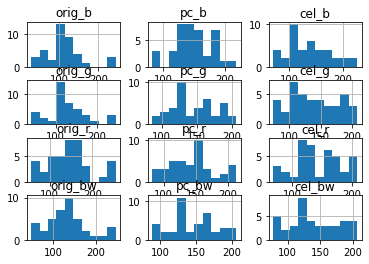

In [ ]:
h = imagens.hist()

Com os dados em mãos, podemos explorar as distribuições de cada coluna usando a função *hist* do próprio pandas, que plota o histograma das variáveis numéricas que escolhermos.

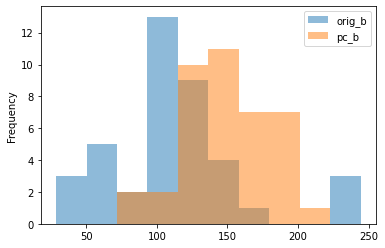

In [ ]:
histogramas = imagens[['orig_b', 'pc_b']].plot.hist(alpha=0.5)

Observe que enquanto o pico de `orig_b` está centralizado em ~100, o pico de `pc_b` está mais para direita, em ~150. Dessa forma, já podemos desconfiar que existe alguma relação entre o monitor e o quão azul é a foto.

Uma possível *variável confundidora* é o quão azul a foto originalmente é. Se estivermos comparando, por exemplo, a foto de um oceano (muito azul) com a foto de um deserto (pouco azul) podemos tirar falsas conclusões. Por isso, vamos tratar essa possível diferença separando as fotos em 2 grupos: as que possuem mais azul do que a média e as que possuem menos azul do que a média.

In [ ]:
media_azul = imagens['orig_b'].mean()
print(media_azul)
print(sum([1 for i in imagens['orig_b'] if i >= media_azul]))
print(sum([1 for i in imagens['orig_b'] if i < media_azul]))

114.35249999999999
18
22


A partir dessa divisão, podemos dividir aleatoriamente os itens de cada lista entre nossos dois grupos:

- No grupo de **controle** utilizaremos o campo `orig_b` (sem o tratamento)
- E no grupo de **tratamento** utilizaremos o campo `pc_b` (com o tratamento).

Na célula abaixo fazemos essa divisão (apesar de grandinho, o código é facinho de entender ^^)

OBS.: Perceba que estamos fazendo uma amostragem **sem repetição** (apagamos os ítens da lista original).

In [ ]:
import random

# Separamos os conjuntos acima e abaixo da média
acima = imagens[imagens['orig_b'] >= media_azul]
abaixo = imagens[imagens['orig_b'] < media_azul]

# Apenas para não repetirmos tantas vezes este bloquinho
def random_assign(fonte, grupo, coluna):
    fonte = fonte.reset_index(drop=True) # precisamos resetar o índice após cada drop
    c1 = random.randint(0, len(fonte)-1)
    grupo.append(fonte.iloc[c1][coluna])
    fonte = fonte.drop(c1)
    return fonte

controle = []
tratamento = []

while len(acima) > 0 or len(abaixo) > 0: # até que os itens das duas listas acabem
  if len(acima) > 0: # apenas lista acima 
    acima = random_assign(acima, controle, 'orig_b')
    acima = random_assign(acima, tratamento, 'pc_b')

  if len(abaixo) > 0: # apenas lista abaixo
    abaixo = random_assign(abaixo, controle, 'orig_b')
    abaixo = random_assign(abaixo, tratamento, 'pc_b')

print(controle)
print(tratamento)

[147.44, 97.14, 116.2, 100.06, 133.85, 107.82, 123.75, 98.51, 152.35, 95.44, 134.98, 59.61, 116.83, 38.07, 152.73, 106.45, 114.39, 56.3, 101.78, 112.89]
[135.39, 111.05, 190.37, 150.04, 144.28, 143.72, 179.48, 190.34, 198.56, 123.89, 154.85, 158.23, 158.74, 94.96, 180.91, 127.91, 180.71, 122.33, 89.1, 138.74]


Agora que já temos nosso conjunto de tratamento e de controle, podemos tirar a média de cada um para comparar se um deles é mais azul do que o outro.

In [ ]:
print('Controle (originais) --',sum(controle)/len(controle))
print('Tratamento (pc) -------',sum(tratamento)/len(tratamento))

Controle (originais) -- 108.32949999999998
Tratamento (pc) ------- 148.67999999999998


Aparentemente, o grupo de tratamento possui valores maiores de azul do que o grupo de controle. Como a média pode ser uma má aproximação para distribuições não normais, vamos dar uma olhada também no histograma desses valores:

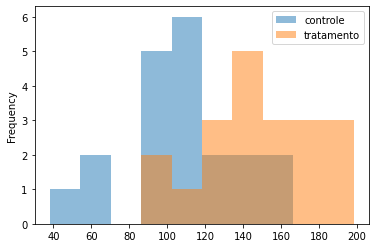

In [ ]:
exp = pd.DataFrame([controle, tratamento]).transpose()
exp.columns = ['controle', 'tratamento']
h = exp.plot.hist(alpha=0.5)

Caso encontrarmos algum outlier na distribuição, podemos utilizar também a mediana para comparar os valores. Abaixo, vamos plotar um boxplot, que já contém a mediana, para ver o quão diferente elas são:

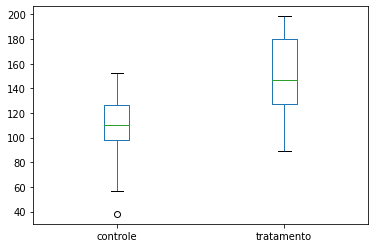

In [ ]:
bp = exp.plot.box()

Para comparar distribuições, sempre dê preferência ao boxplot: por ele ser um gráfico baseado na mediana e outros quartis, podemos ter mais certeza do quanto as duas distribuições se interseccionam. Além disso, ao contrário da análise com a média, podemos ter uma visão melhor de onde estão os outliers e como eles impactam a distribuição.

Olhando para o boxplot acima, de fato temos uma diferença entre os dois grupos. É aqui que precisamos parar e pensar: será que essa diferença é *estatisticamente significativa*? Ou seja, qual a chance de termos pego por sorte uma amostra de fotos em que essa diferença existe? Para isso, precisaremos fazer um *teste de hipótese*, que vamos ver mais adiante.

Mas, supondo que fizemos nosso teste de hipótese e encontramos que a diferença entre os grupos é estatisticamente significativa, alguns pontos sobre o experimento:  
- Ao contrário dos outros estudos que vimos até agora, **a amostragem é não probabilística**, ou seja, nós *escolhemos* nossas unidades experimentais para compor a amostra. Por esse motivo, um experimento pode ser generalizado **apenas para a amostra**.  
- O experimento deve ser replicável justamente para que seja possível aplicá-lo a diversas amostras diferentes e, só assim, generalizar para a população.  
- Apesar dos pesares, se encontrarmos uma correlação num experimento que seja estatisticamente significativa, podemos concluir que a relação é de **causa e consequência**, ao contrário do que vimos no estudo observacional.

## Extra: Viés em estudos estatísticos

Até agora, vimos que se escolhermos o método de amostragem errado, podemos ter uma amostra enviesada, o que dificulta a generalização do nosso estudo para uma população. No entanto, quando estamos trabalhando com pessoas, na prática, isso pode ser um pouco mais complicado: não basta escolher *quem* entrevistamos, também precisamos pensar em *como* vamos entrevistar os escolhidos. Dependendo de como estruturamos nossos questionários, podemos ter resultados enviesados.  

### 1. Tipos de viés

Vamos ver aqui alguns exemplos de vieses em questionários, e para isso vamos utilizar a listagem feita em *A catalog of biases in questionnaires* (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1323316/), por Bernard C.K. Choi, PhD e Anita W.P. Pak, PhD. Veremos as seguintes categorias de viés:

- **Leading question**: Perguntas escritas de um jeito que induzem a uma resposta específica.
- **Mindset**: Perguntas escritas de um jeito que induzem a um *mindset* específico (por exemplo, induzem a respostas positivas ou negativas).
- **Scale format**: Perguntas de escala com um número ímpar de opções tendem a gerar resultados mais imparciais, enquanto escalas com número par exigem uma resposta (apesar de gerarem resultados diferentes, não há consenso de qual das duas é a melhor).
- **Interval overlap**: Perguntas de escala que apresentam interseções entre os intervalos podem gerar confusão.
- **Innacurate recall**: Perguntas que exigem que o participante se lembre de algo que aconteceu há muito tempo ou que ele meça algo muito difícil de ser mensurado certamente gerará resultados imprecisos.

### 2. Modelagem do experimento

Para nosso experimento, vamos criar uma série de perguntas baseadas na seguinte imagem:

<img src="https://lh5.googleusercontent.com/RoDKiLBmkZqJpvNlM6fjy0i_gS_GuK7a1PQs1Woy9CU_3mRWCkYm4MUMA3_Ds-wCIBQ7qIGTnWUQEM3hqAVtdOkc6rOvcigclmD02XQVPGzfEaaezqUmfXg02K5GOMuDlQ=w447"/>

Apesar de o cachorro na foto parecer "sorridente" (afinal, esse é o meme), vamos nos lembrar de que cachorros mostram os dentes quando estão rosnando. E, como sabemos, cachorros geralmente rosnam quando estão com raiva. Tendo isso em mente, vamos criar 2 questionários diferentes: 

- O do grupo de **tratamento**, em que propositalmente encaixaremos diferentes vieses em cada pergunta.
- O do grupo de **controle**, em que tentaremos não incluir nenhum viés propositalmente.

**OBS.:** Como foi apontado pelo próprio estudo, os vieses estudados não são incluidos propositalmente nos questionários. Por isso, é possível que vieses não intencionais acabem aparecendo em cada um dos questionários, por mais cuidadosos que sejamos na sua construção.

Para evitar dois vieses citados no artigo, "nonblinding" (ou seja, quando o participante sabe qual é a hipótese estudada e suas respostas são influenciadas por isso) e "learning" (quando o participante, sabendo a hipótese, acaba descobrindo se está no grupo de controle ou de tratamento através das perguntas), vamos optar por contar ao participante sobre o que é o estudo apenas depois de ele responder ao questionario e, como de costume, não contar a ele se está no grupo de controle ou de tratamento.

### 3. Modelagem dos questionários

Para cada par de fotos, diga qual das perguntas é a enviesada, qual/quais viés/vieses ela tenta introduzir, e qual a resposta esperada para o grupo de tratamento em relação ao grupo de controle.

<img src="https://raw.githubusercontent.com/hype-usp/Hype-Academy/main/Exerc%C3%ADcios%20de%20sala/Materiais%20extras/WhatsApp%20Image%202021-08-15%20at%2020.07.01.jpeg" height='200px'/>
<img src="https://raw.githubusercontent.com/hype-usp/Hype-Academy/main/Exerc%C3%ADcios%20de%20sala/Materiais%20extras/WhatsApp%20Image%202021-08-15%20at%2020.05.53.jpeg" height='200px'/>

<body>
    <details>
        <summary>Resposta - pergunta 1</summary>
        Com esta pergunta, analisaremos o impacto de induzir uma resposta e/ou um *mindset* específico através do modo com que a redigimos. A foto da direita pergunta sobre o sentimento do animal de forma imparcial. A foto da esquerda, no entanto, ao se referir ao animal como "cachorrinho", pode induzir à resposta paralela, "bonitinho", ou no mínimo a um <i>mindset</i> positivo. Por isso, para esta pergunta, podemos esperar um volume menor da resposta "Está com raiva" (resposta negativa) no grupo de tratamento.
    </details> 
</body>  

<img src="https://raw.githubusercontent.com/hype-usp/Hype-Academy/main/Exerc%C3%ADcios%20de%20sala/Materiais%20extras/WhatsApp%20Image%202021-08-15%20at%2020.06.05.jpeg" height='180px'/>
<img src="https://raw.githubusercontent.com/hype-usp/Hype-Academy/main/Exerc%C3%ADcios%20de%20sala/Materiais%20extras/WhatsApp%20Image%202021-08-15%20at%2020.07.10.jpeg" height='180px'/>  
<body>
    <details>
        <summary>Resposta - pergunta 2</summary>
        Esta pergunta testa os dois modos diferentes de fazer uma escala: utilizando um número par de respostas (grupo de controle, à direita), que exige um posicionamento do participante, ou ímpar (grupo de tratamento, à esquerda), que permite respostas mais neutras. No grupo de tratamento, incluímos, ainda, respostas extremas, que afastam os participantes. Portanto, podemos esperar que a maioria das respostas do grupo de tratamento sejam neutras.
    </details> 
</body>  

<img src="https://raw.githubusercontent.com/hype-usp/Hype-Academy/main/Exerc%C3%ADcios%20de%20sala/Materiais%20extras/WhatsApp%20Image%202021-08-15%20at%2020.06.10.jpeg" height='150px'/>
<img src="https://raw.githubusercontent.com/hype-usp/Hype-Academy/main/Exerc%C3%ADcios%20de%20sala/Materiais%20extras/WhatsApp%20Image%202021-08-15%20at%2020.07.20.jpeg" height='150px'/>  
<body>
    <details>
        <summary>Resposta - pergunta 3</summary>
        Novamente, tentamos induzir à resposta "Sim" utilizando uma linguagem mais positiva ("cachorrinho") e, ao mesmo tempo, inquisitiva: ao utilizar o "certo?", deixamos implícito que o participante será julgado se não concordar com a afirmação. Dessa forma, esperamos que o questionário de tratamento apresente um número maior de respostas "Sim".
    </details> 
</body>

<img src="https://raw.githubusercontent.com/hype-usp/Hype-Academy/main/Exerc%C3%ADcios%20de%20sala/Materiais%20extras/WhatsApp%20Image%202021-08-15%20at%2020.06.24.jpeg" height='180px'/>
<img src="https://raw.githubusercontent.com/hype-usp/Hype-Academy/main/Exerc%C3%ADcios%20de%20sala/Materiais%20extras/WhatsApp%20Image%202021-08-15%20at%2020.07.29.jpeg" height='180px'/>  
<body>
    <details>
        <summary>Resposta - pergunta 4</summary>
        Nesta última pergunta, utilizamos dois vieses de escala: o primeiro, são os intervalos que se interseccionam (perceba que na imagem da esquerda, do grupo de tratamento, tanto a primeira opção quanto a segunda englobam o valor 100) e o segundo é a memória imprecisa do participante sobre eventos ocorridos há muito tempo (é difícil mensurar quanto você faz de uma determinada coisa em um ano, principalmente se você nunca parou para pensar sobre isso). Podemos esperar respostas menos extremas para o grupo de tratamento.
    </details> 
</body>

### 4. Execução do experimento

Para a execução do experimento, foram feitos 2 questionários do *google forms*:
- Controle (https://docs.google.com/forms/d/e/1FAIpQLSfRiJmziQAzWH0RX3ucVkxJRCOROAf59tMOQMHOs-4Ab3CAVQ/viewform)
- Tratamento (https://docs.google.com/forms/d/e/1FAIpQLSfsKeJOC-sJAoATmF-eDVCfuuNVe_raQPWOSc4jsUpUTuJY-Q/viewform)

O método de amostragem de participantes escolhido foi o não probabilístico por conveniência e por voluntários. Ou seja: foram escolhidos participantes que são mais próximos e mais fáceis de serem contatados (daí a parte da conveniência) e foi perguntado a cada um deles se queriam participar (e daí o por voluntários). Abaixo, um print de como chegar nos possíveis participantes.

<img src="https://raw.githubusercontent.com/hype-usp/Hype-Academy/main/Exerc%C3%ADcios%20de%20sala/Materiais%20extras/WhatsApp%20Image%202021-08-15%20at%2019.57.30.jpeg"/>

Após o consenso do participante, é importante garantir o RANDOM ASSIGNMENT, ou seja, garantir que o grupo do participante seja escolhido aleatoriamente. Dessa forma, podemos reduzir a probabilidade de que os dois grupos sejam muito heterogêneos entre si. A célula abaixo foi utilizada para o *random assignment*: foi sorteado um número para cada participante, e se o número fosse menor que 50, o grupo seria o de controle; caso contrário, seria o de tratamento.

In [ ]:
import random
random.randint(0,100)

60

### 5. Análise dos resultados

Após o término da coleta de respostas, os resultados foram exportados em .csv, o qual conseguimos acessar pelo link abaixo.

In [ ]:
import pandas as pd
respostas = pd.read_csv('https://raw.githubusercontent.com/hype-usp/Hype-Academy/main/Exerc%C3%ADcios%20de%20sala/experimento.csv')
respostas

,P1,P2,P3,P4,Grupo
0,É bonitinho,Talvez,Sim,100 - 500,Tratamento
1,Está feliz,Com certeza não,Sim,100 - 500,Tratamento
2,Está com raiva,Talvez,Sim,500 - 1000,Tratamento
3,Está feliz,Talvez,Sim,0 - 100,Tratamento
4,É bonitinho,Talvez,Sim,100 - 500,Tratamento
5,Está feliz,Com certeza não,Sim,> 1000,Tratamento
6,Está feliz,Com certeza não,Sim,500 - 1000,Tratamento
7,Está com raiva,Talvez,Sim,0 - 100,Tratamento
8,Está feliz,Com certeza não,Sim,> 1000,Tratamento
9,Está feliz,Não,Sim,Todo dia,Controle


**IMPORTANTE:** Como nossa amostra foi extremamente pequena (menos que 30 participantes), o estudo realizado aqui serve apenas como exemplo de metodologia, e as conclusões que tirarmos do conjunto de dados não serão necessariamente verdadeiras. Além disso, pelo caráter não probabilístico da amostra, espera-se que uma boa parte do viés já tenha sido introduzida nesta etapa da coleta de dados.

### Questão 1
Na questão 1, nossa ideia era tentar influenciar o entrevistado para a resposta "é bonitinho", mas também poderemos ver o viés do *mindset* se encontrarmos uma quantidade maior de respostas positivas no grupo de tratamento. Abaixo, vemos que, de fato, o número de respostas positivas é maior no grupo de tratamento. Curiosamente, o mesmo número de participantes em cada grupo respondeu que o cachorro estava feliz.

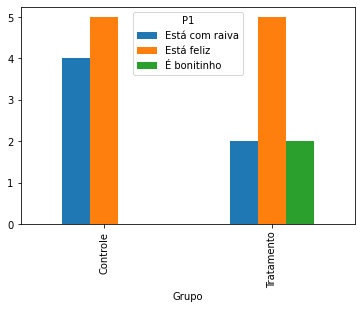

In [ ]:
pd.crosstab(respostas['Grupo'], respostas['P1']).plot.bar()

### Questão 2

Na questão 2, queríamos observar o viés da resposta neutra, ou seja, com a possibilidade de fazer uma escolha "extrema" ou uma escolha neutra, os participantes seriam influenciados a realizar a escolha neutra. Abaixo, vemos que apesar de o maior número de respostas ser "talvez" no grupo de tratamento, uma boa parte dos participantes tinha certeza de que o cão não tinha uma raça definida. E viva o vira-lata caramelo!!!!!!

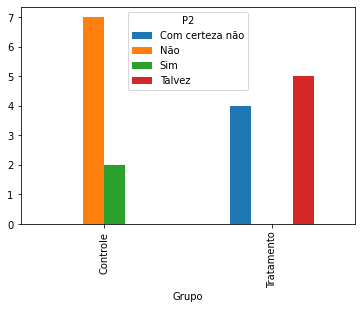

In [ ]:
pd.crosstab(respostas['Grupo'], respostas['P2']).plot.bar()

### Questão 4

Na penúltima pergunta, queríamos ver se uma pergunta "que julga" o participante poderia influenciá-lo a dizer que gosta de memes de cachorro. No entanto, vemos que gostar de memes de cachorro é algo universal. (brincadeira, é só para esta população específica)

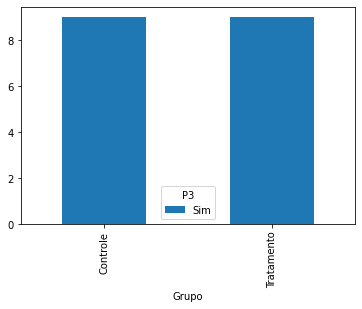

In [ ]:
pd.crosstab(respostas['Grupo'], respostas['P3']).plot.bar()

### Questão 5
Por fim, nosso objetivo era ver como escalas confusas afastam o participante de respostas extremas. Apesar de o gráfico abaixo mostrar um pico no grupo de tratamento na faixa 100-500 (considerada uma resposta mais neutra por estar no centro), as outras opções foram escolhidas uniformemente. Olhando para o grupo de controle, no entanto, uma boa parte das respostas estão concentradas na primeira faixa de valores, que pode ser considerada extrema.

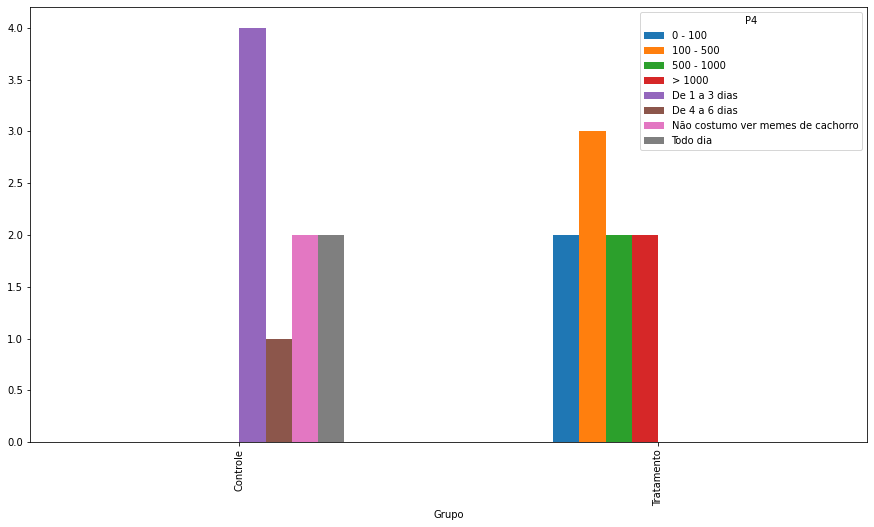

In [ ]:
pd.crosstab(respostas['Grupo'], respostas['P4']).plot.bar(figsize=(15,8))

Para cada pergunta abaixo, diga se ela aparenta ou não ser enviesada, e caso aparente, diga o motivo e tente reformulá-la. OBS.: as perguntas abaixo apresentam mais tipos de viéses do que os apresentados anteriormente.

> O quão velho você é?
<body>
    <details>
        <summary>Resposta</summary>
        Enviesada.<br>
        Pode parecer óbvio que este é o pior jeito de se perguntar a idade de alguém, mas mesmo a famosa "Quantos anos você tem?" pode inibir participantes que têm vergonha da sua idade. O viés apresentado é o *Intrusiveness*, que pode ser facilmente resolvido com uma pergunta indireta, como "Em que ano você nasceu?"
    </details> 
</body>
<br>

> Você concorda que assistir filmes no computador é melhor do que na TV ou que no celular?
<body>
    <details>
        <summary>Resposta</summary>
        Enviesada.<br>
        Essa pergunta tem vários problemas: primeiro, ela tem 2 perguntas em uma (o "ou" praticamente sempre indica isso, viés chamado de *Double-barrelled question*). Segundo, ela foi formulada de um jeito que influencia o participante a dizer que concorda. Um jeito melhor de perguntar a mesma coisa seria algo como "Qual o melhor jeito de assistir filmes: no computador, na TV ou no celular?"
    </details> 
</body>
<br>

> Em que ano você utilizou um dispositivo móvel pela primeira vez?
<body>
    <details>
        <summary>Resposta</summary>
        Enviesada.<br>
        Este é o viés do jargão técnico, ou *Technical jargon*, em que o pesquisador utiliza palavras incomuns ou técnicas demais que o entrevistado talvez não conheça. Por isso, sempre é importante ter em mente que os participantes não necessariamente são desta área. Um jeito melhor de perguntar seria "Em que ano você utilizou um celular pela primeira vez?"
    </details> 
</body>
<br>